# Predicting the Next Top Five Prize Money Owners' Name

### Team member : 
- Haoyu You 34735811
- Xiaomeng Zhou 67409466
- Natalia He 94652260
- Ruodan Deng 29414646

In [1]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
library(ggplot2)
library(stringr)
library(readr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Introduction:

Tennis players' rankings and earnings are particularly important in determining their market worth and success in the world of professional sports. Player ranking and prize money have a largely positive link. Those with higher rankings often take home more substantial prize money than those with lower rankings. Although a high rank might enhance the probability of receiving more prize money, it is not the only factor.

- How can tennis players utilize their age and current ranks for higher prize money?


In order to predict the future top five prize money owners in the sport of tennis, we have opted to use a few players' names, ages, current ranks, and prize money. The name of the player can help us determine the identity of the player. While current rank shows a player's current performance level, age might reveal information about a player's background and probable longevity in the sport. Prize money is a measure of a player's financial success and competitiveness in tournaments.


## Exploratory data analysis:

### Raw data

In [2]:
set.seed(1)
player <- read_csv("player_stats.csv")
player

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Tidy Data

In [3]:
set.seed(2)
player_data <- player |>
               separate(col = `Age`, into = c("age","birth_date"), sep = "\\(") |>
               mutate(age = as.integer(age)) |>
               mutate(birth_date = str_remove(birth_date, "\\)")) |>
               separate(col = `Current Rank`, into = c("current_rank","current_score"), sep = "\\(") |>
               mutate(current_rank = as.numeric(current_rank)) |>
               mutate(current_score = as.numeric(str_remove(current_score, "\\)"))) |>
               mutate(prize_money = str_remove_all(`Prize Money`, "[A-Za-z$, ]")) |>
               mutate(prize_money = as.numeric(prize_money)) |>
               mutate(name = as.character(Name)) |>
               select(age, current_rank, prize_money) |>
               filter(age != "NA",
                      current_rank != "NA",
                      prize_money != "NA")
               
player_data

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,current_rank,prize_money
<int>,<dbl>,<dbl>
18,326,59040
32,178,3261567
21,236,374093
⋮,⋮,⋮
20,397,40724
20,382,57943
22,451,61984


### Target Data

In [4]:
first_5 <- player_data |>
           arrange(-prize_money) |>
           slice(1,2,3,4,5)
first_5

age,current_rank,prize_money
<int>,<dbl>,<dbl>
33,1,119601561
29,11,13578010
32,12,13470614
37,200,13376235
31,9,12067808


## Regression

### Training data

In [5]:
set.seed(3)
player_split <- player_data |>
                initial_split(prop = 0.75, strata = prize_money)
player_training <- training(player_split)
player_testing <- testing(player_split)

In [6]:
set.seed(4)
options(repr.plot.width = 8, repr.plot.height = 7)

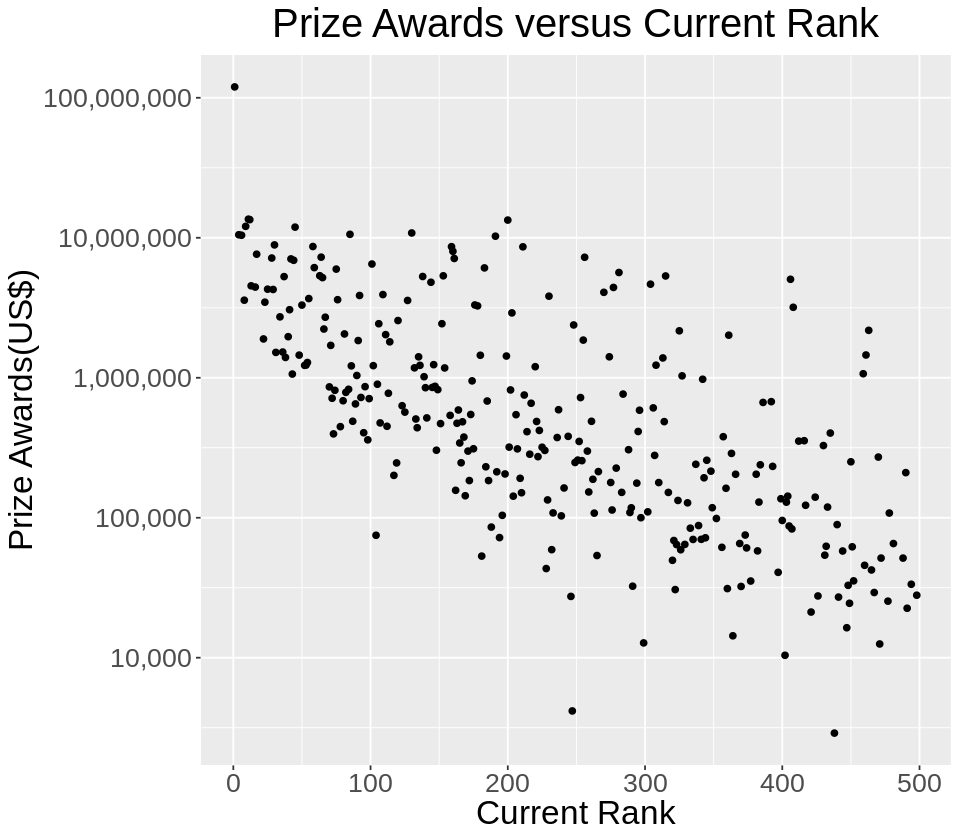

In [7]:
set.seed(5)
current_rank_plot <- player_training |>
                    ggplot(aes(x = current_rank, y = prize_money)) +
                    geom_point() +
                    labs(x = "Current Rank", y = "Prize Awards(US$)") +
                    theme(text = element_text(size = 20),
                         plot.title = element_text(hjust = 0.5)) +
                    scale_y_log10(labels = comma) +
                    ggtitle("Prize Awards versus Current Rank")

current_rank_plot

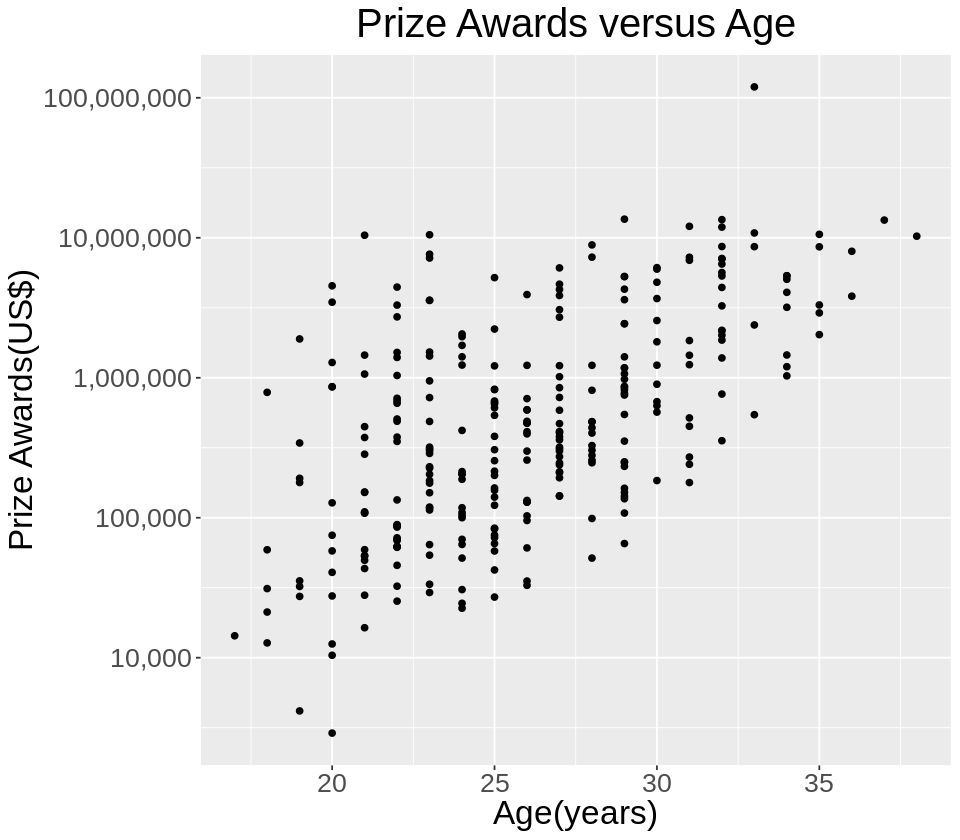

In [8]:
set.seed(6)
age_plot <- player_training |>
            ggplot(aes(x = age, y = prize_money)) +
            geom_point() +
            labs(x = "Age(years)", y = "Prize Awards(US$)") +
            theme(text = element_text(size = 20),
                  plot.title = element_text(hjust = 0.5)) +
            scale_y_log10(labels = comma) +
            ggtitle("Prize Awards versus Age")

age_plot

### Current Rank Prediction

In [9]:
set.seed(7)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
           set_engine("kknn") |>
           set_mode("regression")

knn_recipe_cr <- recipe(prize_money ~ current_rank, data = player_training) |>
             step_center(all_predictors()) |>
             step_scale(all_predictors())

player_vfold <- vfold_cv(player_training, v = 5, strata = prize_money)

player_workflow_cr <- workflow() |>
                     add_model(knn_spec) |>
                     add_recipe(knn_recipe_cr)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

player_results_cr <- player_workflow_cr |>
                    tune_grid(resample = player_vfold, grid = gridvals) |>
                    collect_metrics()

player_min_cr <- player_results_cr |>
              filter(.metric == "rmse") |>
              arrange(mean) |> 
              slice(1) |>
              pull(neighbors)

player_min_cr

[1] 49

In [10]:
set.seed(8)
player_best_spec_cr <- nearest_neighbor(weight_func = "rectangular", neighbors = 49) |>
          set_engine("kknn") |>
          set_mode("regression")

player_best_fit_cr <- workflow() |>
          add_recipe(knn_recipe_cr) |>
          add_model(player_best_spec_cr) |>
          fit(data = player_training)

player_summary_cr <- player_best_fit_cr |>
           predict(player_testing) |>
           bind_cols(player_testing)

player_summary_cr

.pred,age,current_rank,prize_money
<dbl>,<int>,<dbl>,<dbl>
979868,30,293,158269
6921223,29,27,4850190
1805586,22,189,39679
⋮,⋮,⋮,⋮
832734.6,32,260,2013015
1874815.8,24,103,414637
992878.5,28,292,1048314


In [11]:
set.seed(9)
rmspe_cr <- player_summary_cr |>
         metrics(truth = prize_money, estimate = .pred) |>
         filter(.metric == "rmse") |>
         pull(.estimate)
rmspe_cr

[1] 1706358

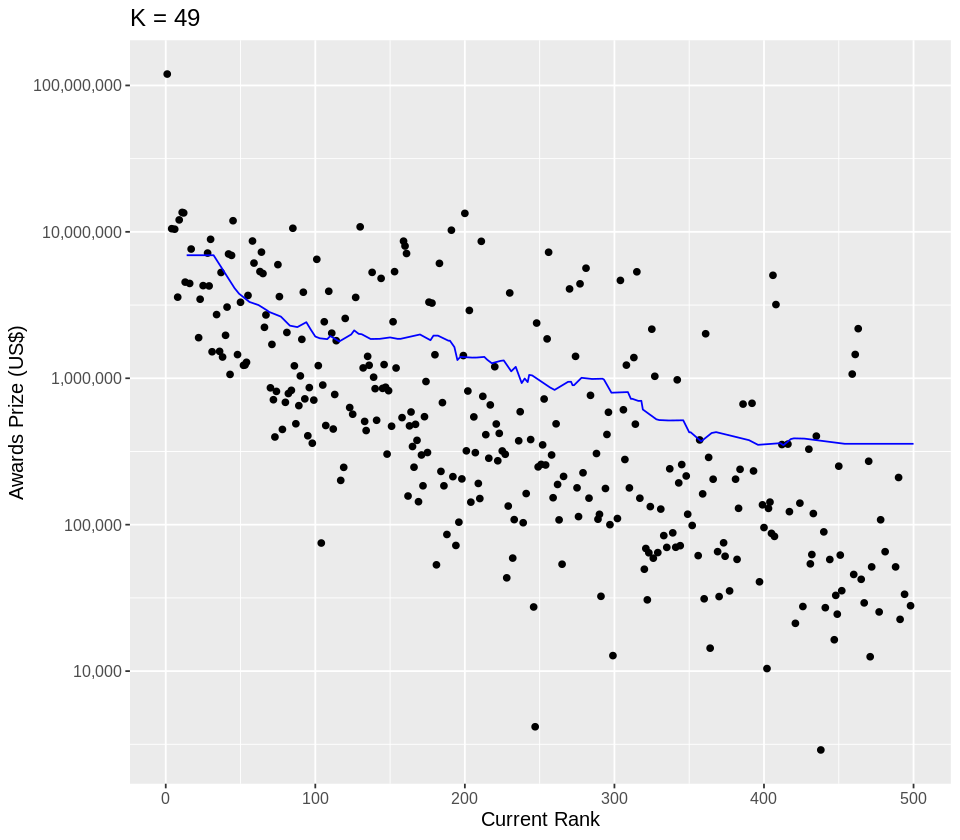

In [12]:
set.seed(10)
player_cr_plot <- ggplot(player_training, aes(x = current_rank, y = prize_money)) + 
                 geom_point() + geom_line(data = player_summary_cr,
                                          color = "blue",
                                          aes(x = current_rank, y = .pred)) +
                 scale_y_log10(labels = comma) +
                 labs(x = "Current Rank", y = 'Awards Prize (US$)') +
                 ggtitle(paste0("K = ", 49)) +
                 theme(text = element_text(size = 12))
player_cr_plot

In [13]:
set.seed(16)
new_rank <- tibble(current_rank = c(1, 2, 3, 4, 5))

prediction_cr <- predict(player_best_fit_cr, new_rank)
prediction_cr

.pred
<dbl>
6921223
6921223
6921223
6921223
6921223


### Age Prediction

In [14]:
set.seed(11)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
           set_engine("kknn") |>
           set_mode("regression")

knn_recipe_age <- recipe(prize_money ~ age, data = player_training) |>
             step_center(all_predictors()) |>
             step_scale(all_predictors())

player_vfold <- vfold_cv(player_training, v = 5, strata = prize_money)

player_workflow_age <- workflow() |>
                     add_model(knn_spec) |>
                     add_recipe(knn_recipe_age)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

player_results_age <- player_workflow_age |>
                    tune_grid(resample = player_vfold, grid = gridvals) |>
                    collect_metrics()

player_age_min <- player_results_age |>
              filter(.metric == "rmse") |>
              arrange(mean) |> 
              slice(1) |>
              pull(neighbors)

player_age_min

[1] 59

In [15]:
set.seed(12)
player_best_spec_age <- nearest_neighbor(weight_func = "rectangular", neighbors = 59) |>
          set_engine("kknn") |>
          set_mode("regression")

player_best_fit_age <- workflow() |>
          add_recipe(knn_recipe_age) |>
          add_model(player_best_spec_age) |>
          fit(data = player_training)

player_summary_age <- player_best_fit_age |>
           predict(player_testing) |>
           bind_cols(player_testing)

player_summary_age

.pred,age,current_rank,prize_money
<dbl>,<int>,<dbl>,<dbl>
2079521,30,293,158269
1710331,29,27,4850190
1026031,22,189,39679
⋮,⋮,⋮,⋮
5816803.6,32,260,2013015
635085.5,24,103,414637
1367129.1,28,292,1048314


In [16]:
set.seed(13)
rmspe_age <- player_summary_age|>
         metrics(truth = prize_money, estimate = .pred) |>
         filter(.metric == "rmse") |>
         pull(.estimate)
rmspe_age

[1] 2272920

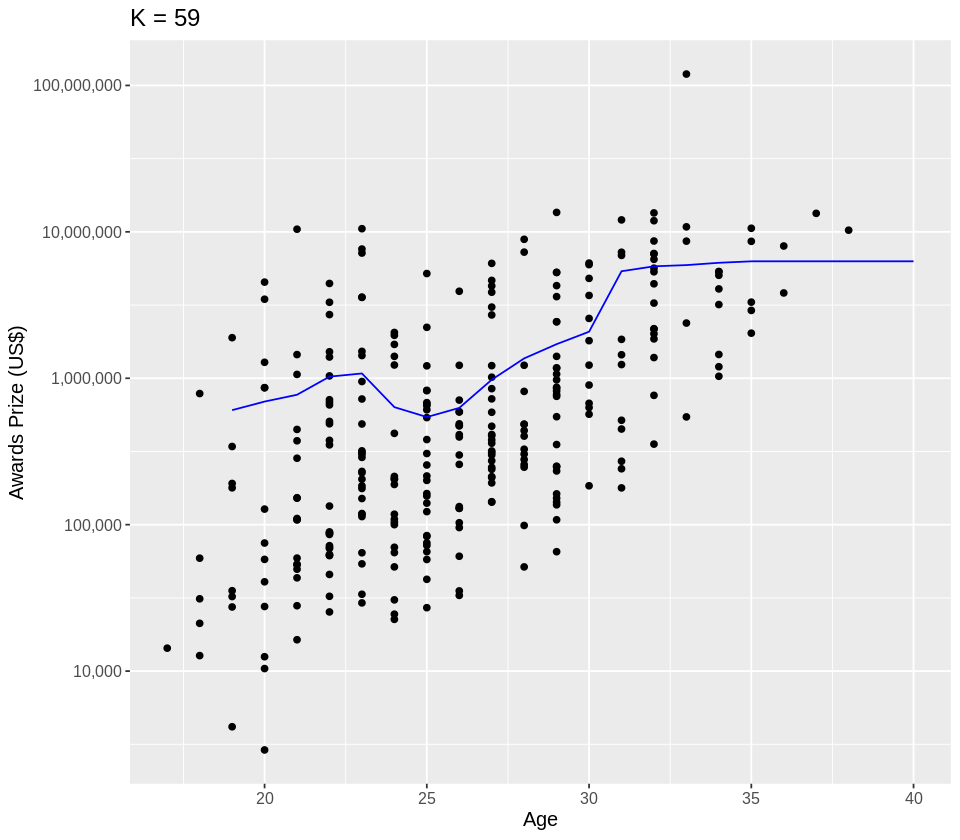

In [17]:
set.seed(14)
player_age_plot <- ggplot(player_training, aes(x = age, y = prize_money)) + 
                 geom_point() + geom_line(data = player_summary_age,
                                          color = "blue",
                                          aes(x = age, y = .pred)) +
                 scale_y_log10(labels = comma) +
                 labs(x = "Age", y = 'Awards Prize (US$)') +
                 ggtitle(paste0("K = ", 59)) +
                 theme(text = element_text(size = 12))
player_age_plot

In [18]:
set.seed(15)

new_age <- tibble(age = c(34,30,33,38,32))

prediction_age <- predict(player_best_fit_age, new_age)
prediction_age

.pred
<dbl>
6148117
2079521
5928541
6291448
5816804


### Combine prediction

In [19]:
set.seed(17)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
           set_engine("kknn") |>
           set_mode("regression")

knn_recipe_com <- recipe(prize_money ~ current_rank + age, data = player_training) |>
             step_center(all_predictors()) |>
             step_scale(all_predictors())

player_vfold <- vfold_cv(player_training, v = 5, strata = prize_money)

player_workflow_com <- workflow() |>
                     add_model(knn_spec) |>
                     add_recipe(knn_recipe_com)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

player_results_com <- player_workflow_com |>
                    tune_grid(resample = player_vfold, grid = gridvals) |>
                    collect_metrics()

player_min_com <- player_results_com |>
              filter(.metric == "rmse") |>
              arrange(mean) |> 
              slice(1) |>
              pull(neighbors)

player_min_com

[1] 3

In [20]:
set.seed(18)
player_best_spec_com <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
          set_engine("kknn") |>
          set_mode("regression")

player_best_fit_com <- workflow() |>
          add_recipe(knn_recipe_com) |>
          add_model(player_best_spec_com) |>
          fit(data = player_training)

player_summary_com <- player_best_fit_com |>
           predict(player_testing) |>
           bind_cols(player_testing)

player_summary_com

.pred,age,current_rank,prize_money
<dbl>,<int>,<dbl>,<dbl>
519851.7,30,293,158269
7716427.0,29,27,4850190
373310.7,22,189,39679
⋮,⋮,⋮,⋮
3973841,32,260,2013015
1469433,24,103,414637
392590,28,292,1048314


In [21]:
set.seed(19)
rmspe_com <- player_summary_com|>
         metrics(truth = prize_money, estimate = .pred) |>
         filter(.metric == "rmse") |>
         pull(.estimate)
rmspe_com

[1] 3998954

In [22]:
set.seed(20)
new_com <- tibble(current_rank = c(1,2,3,4,5), age = c(34,30,33,38,32))

prediction_com <- predict(player_best_fit_com, new_com)
prediction_com

.pred
<dbl>
46142577
9979465
46711402
5989820
48379994


## Linear

### Current Rank

In [23]:
set.seed(21)
lm_spec_cr <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe_cr <- recipe(prize_money ~ current_rank, data = player_training)

lm_fit_cr <- workflow() |>
  add_recipe(lm_recipe_cr) |>
  add_model(lm_spec_cr) |>
  fit(data = player_training)

lm_fit_cr

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  current_rank  
     5355258        -14297  


`geom_smooth()` using formula 'y ~ x'



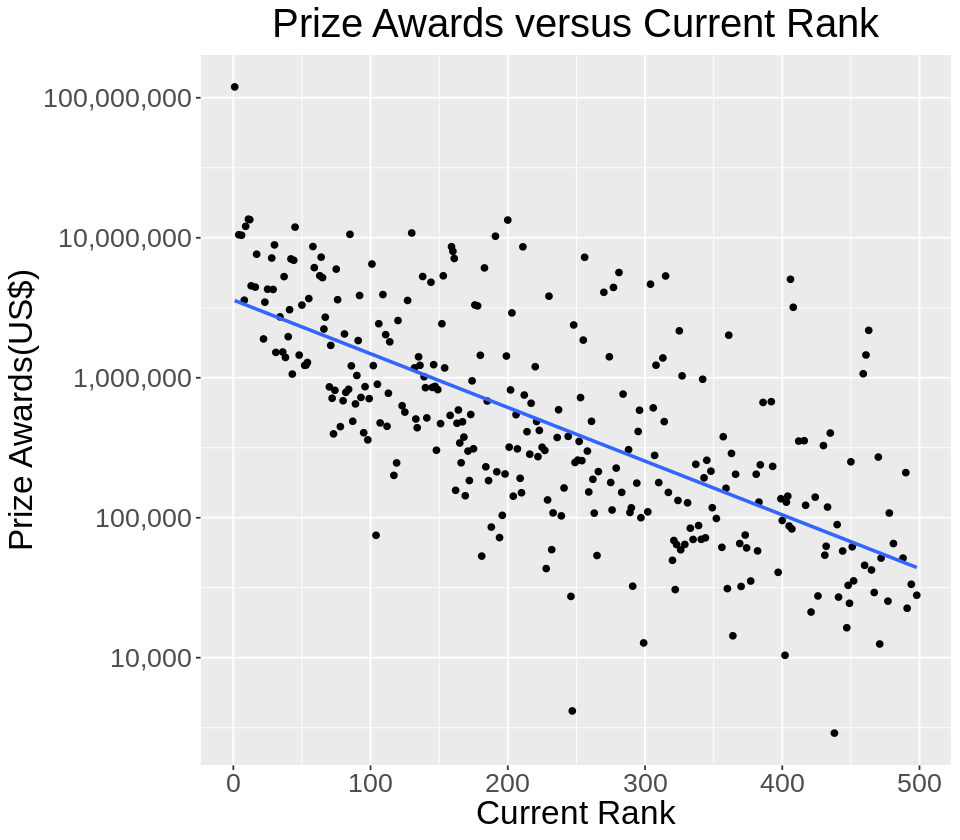

In [24]:
set.seed(22)
lm_cr_plot_final <- ggplot(player_training, aes(x = current_rank, y = prize_money)) +
                    geom_point() +
                    labs(x = "Current Rank", y = "Prize Awards(US$)") +
                    theme(text = element_text(size = 20),
                         plot.title = element_text(hjust = 0.5)) +
                    scale_y_log10(labels = comma) +
                    ggtitle("Prize Awards versus Current Rank") +
                    geom_smooth(method = "lm", se = FALSE)

lm_cr_plot_final

In [25]:
set.seed(23)
lm_cr_test_results <- lm_fit_cr |>
  predict(player_testing) |>
  bind_cols(player_testing) |>
  metrics(truth = prize_money, estimate = .pred) |>
  filter(.metric == "rmse")
lm_cr_test_results
new_rank <- tibble(current_rank = c(1,2,3,4,5))
predict(lm_fit_cr, new_rank)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2074951


.pred
<dbl>
5340961
5326665
5312368
5298071
5283775


### Age

In [26]:
set.seed(24)

lm_spec_age <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe_age <- recipe(prize_money ~ age, data = player_training)

lm_fit_age <- workflow() |>
  add_recipe(lm_recipe_age) |>
  add_model(lm_spec_age) |>
  fit(data = player_training)

lm_fit_age

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
   -9413486       440311  


`geom_smooth()` using formula 'y ~ x'



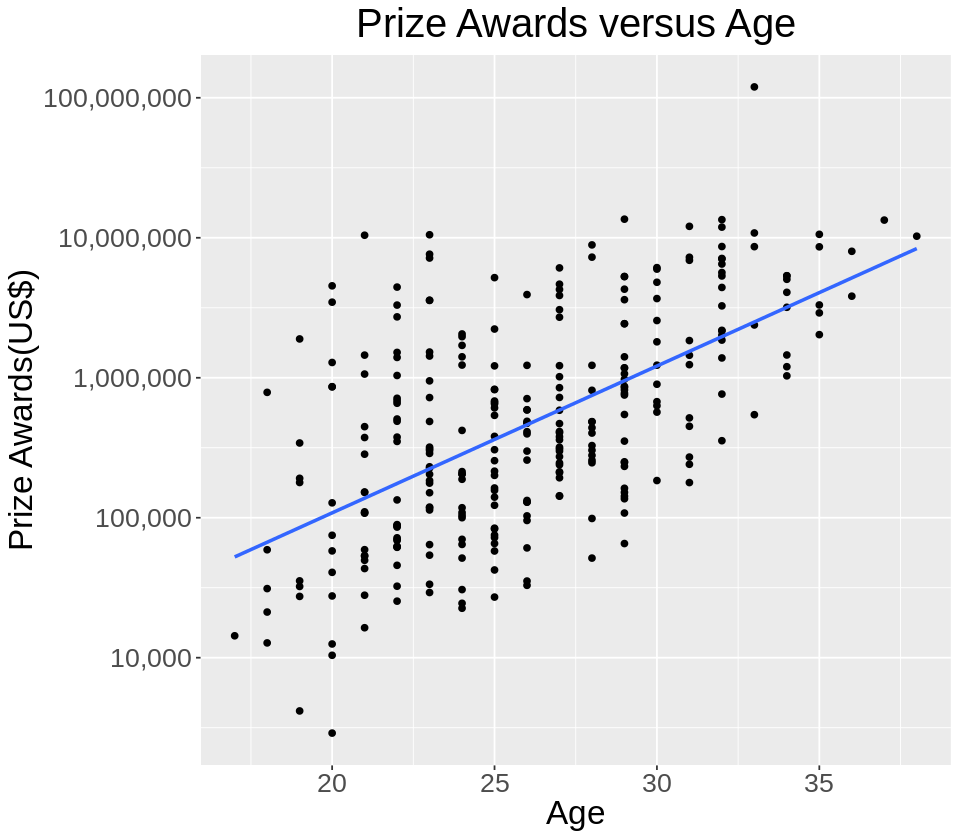

In [27]:
set.seed(25)
lm_cr_plot_final <- ggplot(player_training, aes(x = age, y = prize_money)) +
                    geom_point() +
                    labs(x = "Age", y = "Prize Awards(US$)") +
                    theme(text = element_text(size = 20),
                         plot.title = element_text(hjust = 0.5)) +
                    scale_y_log10(labels = comma) +
                    ggtitle("Prize Awards versus Age") +
                    geom_smooth(method = "lm", se = FALSE)

lm_cr_plot_final

In [28]:
set.seed(26)
lm_age_test_results <- lm_fit_age |>
  predict(player_testing) |>
  bind_cols(player_testing) |>
  metrics(truth = prize_money, estimate = .pred) |>
  filter(.metric == "rmse")
lm_age_test_results

new_age <- tibble(age = c(34,30,33,38,32))

predict(lm_fit_age, new_age)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2162781


.pred
<dbl>
5557086
3795843
5116775
7318330
4676464


### Combine

In [29]:
set.seed(27)

lm_spec_com <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe_com <- recipe(prize_money ~ age + current_rank, data = player_training)

lm_fit_com <- workflow() |>
  add_recipe(lm_recipe_com) |>
  add_model(lm_spec_com) |>
  fit(data = player_training)

lm_fit_com

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)           age  current_rank  
    -5238108        394778        -12900  


In [30]:
set.seed(28)
lm_com_test_results <- lm_fit_com |>
  predict(player_testing) |>
  bind_cols(player_testing) |>
  metrics(truth = prize_money, estimate = .pred) |>
  filter(.metric == "rmse")
lm_com_test_results

new_com <- tibble(current_rank = c(1,2,3,4,5), age = c(34,30,33,38,32))

predict(lm_fit_com, new_com)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2072046


.pred
<dbl>
8171443
6579431
7750865
9711855
7330288


## Method

We first need to determine the k-value and find the most appropriate k-value using cross- validation and RMSE. 

To find the minimum RMSE complete the model with the nearest_neighbor() equation, where neighbors should be equal to tune(). 

The recipe() equation is used to complete the recipe, followed by the vfold_cv() equation to determine the training data into 5 folds, with strata equal to the prize money. 

The workflow() equation is used to combine the recipe and the model. After completing the preparation work, the tune_grid() and collect_metrics() equations are used to complete the k-value prediction, and the filter(), arrange() and slice() are used to find the k-value with the lowest  mean of RMSE. 

Next we will start predicting the prize money, using nearest_neighbor(), recipe(), workflow(), predict(), bind_cols() and metrics() functions to complete the prediction, and then rank the predicted results from largest to smallest, find the top five highest prize money and the corresponding current ranking, and use the filter() equation to find the corresponding names.

Finally, the relationship between age and prize money and the relationship between current ranking and prize money can be plotted using the ggplot() equation. 


## Expected outcomes and significance:


Through analyzing the relationships among player current ranks, ages and prize money, our objective is to preliminarily predict the top five players who have earned the highest prize money in the upcoming season. 

By conducting a preliminary analysis of the connection between these two variables and prize money, we can gain a deeper understanding of the factors that influence prize money evaluation. This understanding can serve as an available guide for players, helping them to strive for higher earnings in their respective fields.

Given the absence of complete individual player data, it is crucial to consider other variables that might influence the evaluation of prize money. Are there any additional factors apart from those mentioned that impact the assessment of earnings?
